<a href="https://colab.research.google.com/github/Nivedithaks/niveditha/blob/main/MAJOR_PROJECT_2(CLUSTER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#UNSUPERVISED LEARNING - CLUSTERING - K MEANS CLUSTERING
#IN CLUSTERING - THERE IS NO OUTPUT(y) , we consider only input to train our model.

In [ ]:
#1.TAKE DATA AND CREATE DATAFRAME
import pandas as pd
df = pd.read_csv('/content/exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [ ]:
df.shape #1000 rows and 8 columns

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#Input - reading score and writing score

In [ ]:
#4.divide the data into output
x = df.iloc[:,6:8].values
x

array([[67, 63],
       [59, 55],
       [60, 50],
       ...,
       [35, 41],
       [74, 82],
       [60, 62]])

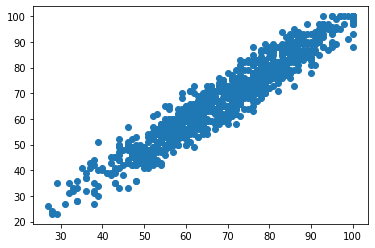

In [ ]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.scatter(df['reading score'],df['writing score'])
#Here we got only one cluster before applying any clustering technique


In [ ]:
#Here our main task to find out the number of clusters(k)
import numpy as np
np.sqrt(1000) #1000 total number of points
#no. of clusters is k
#k value should not exceed the square root of the total number of points
#Hence k value should be in the range of 2 to 14

31.622776601683793

In [ ]:
#we need to find out the number of clusters(k)
#1.ELBOW METHOD - Slightly Confusing
#2.SILHOUETTE SCORE METHOD - Very accurate

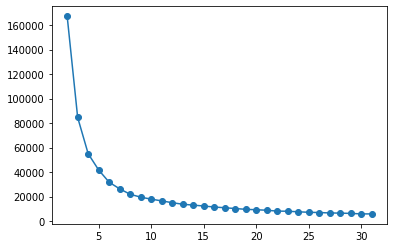

In [ ]:
#1.ELBOW METHOD
from sklearn.cluster import KMeans
k = range(2,32)

sse = [] #blank list
#for i in range of (2,32):
for i in k :
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  sse.append(model_demo.inertia_)#.inertia_ - calculates the sum of square error
plt.scatter(k,sse)
plt.plot(k,sse)

                

In [ ]:
#We will now consider the point at which the Elbow is more prominent
#We will consider k as 2 for now , but we are not sure

2 Clusters , Score = 0.5283940608724609
3 Clusters , Score = 0.5118574353270787
4 Clusters , Score = 0.4764263862458092
5 Clusters , Score = 0.44490167186970053
6 Clusters , Score = 0.4415629288485937
7 Clusters , Score = 0.4105173735531888
8 Clusters , Score = 0.413948958745728
9 Clusters , Score = 0.3880526089684858
10 Clusters , Score = 0.3791032038050047
11 Clusters , Score = 0.35071462333554987
12 Clusters , Score = 0.367192994229533
13 Clusters , Score = 0.372638516823848
14 Clusters , Score = 0.3698401145589363
15 Clusters , Score = 0.3537748482011308
16 Clusters , Score = 0.3533237589401192
17 Clusters , Score = 0.3457829394439709
18 Clusters , Score = 0.34632534323766584
19 Clusters , Score = 0.36227433945776877
20 Clusters , Score = 0.3525416882024351
21 Clusters , Score = 0.3557813444978391
22 Clusters , Score = 0.36595239822945147
23 Clusters , Score = 0.3482688250406031
24 Clusters , Score = 0.3571646026320185
25 Clusters , Score = 0.36430052453836204
26 Clusters , Score =

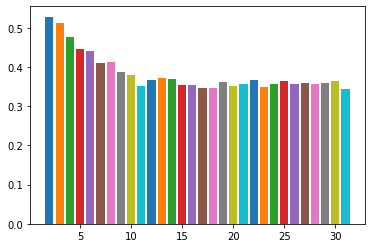

In [ ]:
#2.SILHOUETTE SCORE METHOD
from sklearn.metrics import silhouette_score
k = range(2,32)
for i in k:
  model_demo = KMeans(n_clusters = i,random_state = 0)
  model_demo.fit(x)
  y_pred = model_demo.predict(x)
  print(f"{i} Clusters , Score = {silhouette_score(x,y_pred)}")
  plt.bar(i,silhouette_score(x,y_pred))


In [ ]:
#CONFIRMATION : THE NUMBER OF CLUSTERS TO BE CONSIDERED IS 2.

In [ ]:
#7.APPLY CLUSTERER
k = 2
from sklearn.cluster import KMeans

model = KMeans(n_clusters = k,random_state = 0)
model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [ ]:
y = model.predict(x) #predicted output
y

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
y.size

1000

In [ ]:
x[y == 1,1]
#so the first '1' is cluster no 1 and second '1' is column index 1
#the value of input , when cluster 1 is selected column 1 is selected

array([63, 55, 50, 63, 65, 45, 57, 42, 65, 44, 31, 55, 54, 32, 42, 56, 60,
       51, 39, 71, 54, 64, 51, 57, 57, 64, 60, 49, 47, 62, 51, 48, 68, 59,
       62, 56, 49, 60, 57, 47, 63, 59, 45, 62, 42, 59, 39, 61, 42, 67, 49,
       49, 53, 62, 67, 58, 44, 33, 47, 33, 63, 55, 58, 62, 45, 58, 64, 45,
       64, 57, 56, 54, 68, 49, 64, 57, 60, 57, 66, 46, 44, 59, 58, 47, 59,
       65, 58, 68, 59, 62, 60, 56, 51, 64, 49, 59, 64, 53, 53, 51, 61, 66,
       48, 48, 51, 70, 65, 65, 47, 70, 67, 66, 64, 60, 68, 62, 44, 39, 33,
       64, 64, 58, 63, 28, 42, 61, 52, 70, 61, 54, 59, 62, 50, 50, 63, 64,
       62, 65, 47, 66, 39, 49, 42, 59, 60, 46, 52, 50, 39, 24, 40, 49, 66,
       66, 60, 63, 67, 53, 43, 63, 64, 49, 54, 64, 60, 59, 65, 43, 40, 58,
       49, 62, 58, 47, 54, 61, 54, 64, 64, 47, 51, 64, 48, 43, 66, 65, 67,
       60, 64, 60, 56, 42, 43, 50, 61, 64, 51, 23, 56, 54, 66, 56, 68, 43,
       58, 61, 61, 61, 64, 59, 59, 33, 63, 38, 30, 66, 47, 66, 44, 66, 62,
       61, 35, 64, 53, 64

In [ ]:
np.unique(y,return_counts = True)

(array([0, 1], dtype=int32), array([508, 492]))

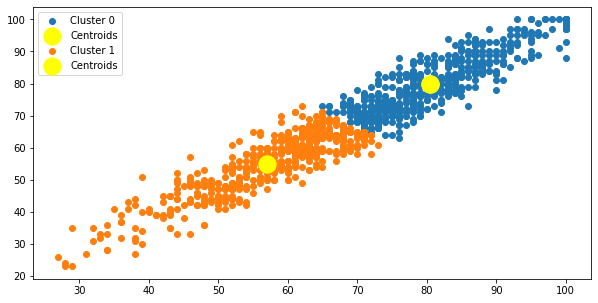

In [ ]:
#FINAL VISUALISATION
plt.figure(figsize = (10,5))
for i in range(k):
  plt.scatter(x[y == i,0],x[y == i,1],label = f'Cluster {i}')
  plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 300,c = 'yellow',label = 'Centroids')

plt.legend()